# Stepping through the basic processessing of increment widths

## importing and setting up some basic things we will use

In [110]:
import pandas as pd
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate

pd.set_option('display.max_rows', 20)



## generate and save a sample timeseries as a text file

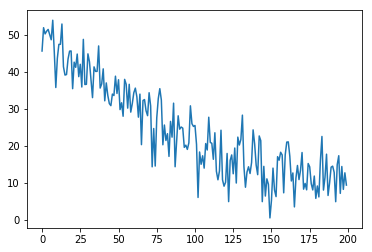

In [111]:
series1 = np.array([np.power(200-i,2) for i in range(200)])*1.0e-3
series2 = [gauss(0.0, 5.0) for i in range(200)]
series = series1 + series2
series -= np.min(series)
series += 0.5
plt.plot(series)

In [112]:
df = pd.DataFrame(series)
df.to_csv('example_shell_data.csv', float_format='%.2f', na_rep="NAN!")


## Read your data file in (as an example, I'm just re-reading in the file we just produced)

In [113]:
df = pd.read_csv('example_shell_data.csv',names = ['LineNumber','IncrementWidth'],skiprows=1)
# Note here I'm skipping the 1st row because my file had no headers, and I'm adding thee manually. You could just make sure your file matches the format of 'example_shell_data.csv or make changes to this line of code


### check it has read in OK

In [114]:
df

,LineNumber,IncrementWidth
0,0,45.69
1,1,52.00
2,2,50.32
3,3,51.06
4,4,51.54
5,5,50.15
6,6,48.74
7,7,54.02
8,8,45.48
9,9,35.81


## Add a new column with the logged values and display the results

In [115]:
df['LogValues'] = np.log10(df['IncrementWidth'])
df

,LineNumber,IncrementWidth,LogValues
0,0,45.69,1.659821
1,1,52.00,1.716003
2,2,50.32,1.701741
3,3,51.06,1.708081
4,4,51.54,1.712144
5,5,50.15,1.700271
6,6,48.74,1.687886
7,7,54.02,1.732555
8,8,45.48,1.657820
9,9,35.81,1.554004


## Generating the spline fit

In [116]:
df['Spline'] = interpolate.UnivariateSpline(df.index, df.LogValues, k=3)(df.index)


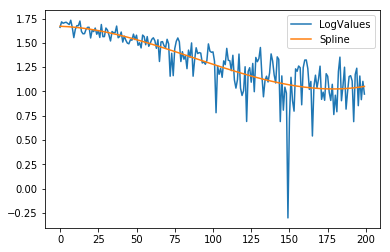

In [117]:
df.plot(y=["LogValues", "Spline"])

## Subtracting the spline fit

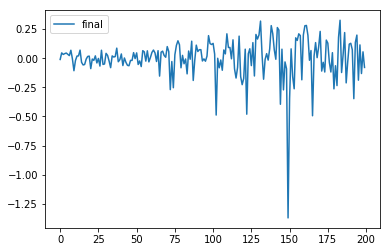

In [118]:
df['final'] = df.LogValues - df.Spline
df.plot(y='final')


## Saving out the data

In [119]:
df.to_csv('processed_shell_data.csv', float_format='%.2f', na_rep="NAN!")
# Note that you will want to change the name 'processed_shell_data.csv' to whatever you want to save that file as
